<a href="https://colab.research.google.com/github/hemakumar5153/cnn-optimization/blob/main/Copy_of_capstone_cifar10_all_optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar100
import numpy

In [ ]:
import keras
from google.colab import files
from keras.models import Model
from keras.layers import *
from keras.models import Model, load_model
from keras import initializers
from keras import optimizers
from google.colab import drive
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.datasets import cifar10
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Label: [3]


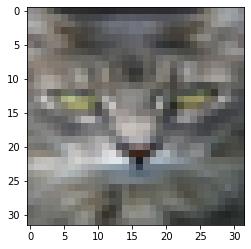

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# it's always better to normalize 
X_train = X_train.astype('float32') / 255



In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
# it's always better to normalize 
X_test = X_test.astype('float32') / 255



In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (50000, 32, 32, 3)
Images in X_train: 50000
Images in X_test: 10000


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (50000, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adadelta,Adagrad,Adam,RMSprop,SGD

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Conv2D

## CUSTOM MODEL 1

In [ ]:
def build_model(optimizer):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(32,32,3)))
  model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return model

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  model = build_model(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=model.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1094/1094 [==============================] - 17s 6ms/step - loss: 1.8446 - accuracy: 0.3402 - val_loss: 1.7102 - val_accuracy: 0.3851
Epoch 2/10
1094/1094 [==============================] - 6s 6ms/step - loss: 1.5321 - accuracy: 0.4567 - val_loss: 1.5768 - val_accuracy: 0.4384
Epoch 3/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.3615 - accuracy: 0.5168 - val_loss: 1.3552 - val_accuracy: 0.5177
Epoch 4/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2442 - accuracy: 0.5572 - val_loss: 1.2774 - val_accuracy: 0.5406
Epoch 5/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1495 - accuracy: 0.5914 - val_loss: 1.2779 - val_accuracy: 0.5487
Epoch 6/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0646 - accuracy: 0.6253 - val_loss: 1.2029 - val_accuracy: 0.5808
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/st

## CUSTOM MODEL 2

In [ ]:
def build_model1(optimizer):
  model=Sequential()
  model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return model

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  model = build_model1(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=model.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1094/1094 [==============================] - 9s 7ms/step - loss: 2.1959 - accuracy: 0.1759 - val_loss: 2.0387 - val_accuracy: 0.2723
Epoch 2/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.9668 - accuracy: 0.2809 - val_loss: 1.8846 - val_accuracy: 0.3367
Epoch 3/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.7719 - accuracy: 0.3504 - val_loss: 1.7427 - val_accuracy: 0.3747
Epoch 4/10
1094/1094 [==============================] - 7s 7ms/step - loss: 1.6645 - accuracy: 0.3913 - val_loss: 1.6294 - val_accuracy: 0.4210
Epoch 5/10
1094/1094 [==============================] - 7s 7ms/step - loss: 1.5847 - accuracy: 0.4175 - val_loss: 1.5610 - val_accuracy: 0.4406
Epoch 6/10
1094/1094 [==============================] - 7s 7ms/step - loss: 1.5285 - accuracy: 0.4419 - val_loss: 1.5126 - val_accuracy: 0.4538
Epoch 7/10
1094/1094 [==============================] - 7s 7ms/ste

## VGG19

In [ ]:
vgg19 = VGG19(include_top=False,input_shape=(32,32,3))
print(vgg19.summary())

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
def ModelVGG19(optimizer):
  modelvgg19=Sequential()
  for layer in vgg19.layers:
    modelvgg19.add(layer)

  for layer in modelvgg19.layers:
    layer.trainable=False

  modelvgg19.add(Flatten())
  modelvgg19.add(Dense(128))
  modelvgg19.add(Dense(10,activation='softmax'))
  modelvgg19.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelvgg19



In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelvgg19 = ModelVGG19(i)
  hist=modelvgg19.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split = 0.3)
  m1=modelvgg19.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/5
1094/1094 [==============================] - 21s 18ms/step - loss: 1.7107 - accuracy: 0.4011 - val_loss: 1.5309 - val_accuracy: 0.4667
Epoch 2/5
1094/1094 [==============================] - 19s 17ms/step - loss: 1.4726 - accuracy: 0.4868 - val_loss: 1.4833 - val_accuracy: 0.4744
Epoch 3/5
1094/1094 [==============================] - 19s 17ms/step - loss: 1.4086 - accuracy: 0.5079 - val_loss: 1.3995 - val_accuracy: 0.5080
Epoch 4/5
1094/1094 [==============================] - 18s 17ms/step - loss: 1.3685 - accuracy: 0.5211 - val_loss: 1.3545 - val_accuracy: 0.5255
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 1.3466 - accuracy: 0.5301

 Model test accuracy with SGD optimizer is 53.01% 


=================== Running with Adagrad Optimizer ====================

Epoch 1/5
1094/1094 [==============================] - 19s 17ms/step - loss: 1.9660 - accuracy: 0.3129 - val_loss: 1.7980 -

## VGG16

In [ ]:
vgg16 = VGG16(include_top=False,input_shape=(32,32,3))
print(vgg16.summary())


58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
def ModelVGG16(optimizer):
  modelvgg16=Sequential()
  for layer in vgg16.layers:
    modelvgg16.add(layer)

  for layer in modelvgg16.layers:
    layer.trainable=False

  modelvgg16.add(Flatten())
  modelvgg16.add(Dense(128))
  modelvgg16.add(Dense(10,activation='softmax'))
  modelvgg16.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelvgg16

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelvgg16 = ModelVGG16(i)
  hist=modelvgg16.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=modelvgg16.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1094/1094 [==============================] - 16s 14ms/step - loss: 1.7286 - accuracy: 0.3991 - val_loss: 1.5286 - val_accuracy: 0.4727
Epoch 2/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.4523 - accuracy: 0.4963 - val_loss: 1.4132 - val_accuracy: 0.5107
Epoch 3/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.3760 - accuracy: 0.5208 - val_loss: 1.3573 - val_accuracy: 0.5267
Epoch 4/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.3346 - accuracy: 0.5380 - val_loss: 1.3514 - val_accuracy: 0.5269
Epoch 5/10
1094/1094 [==============================] - 15s 14ms/step - loss: 1.3019 - accuracy: 0.5465 - val_loss: 1.3148 - val_accuracy: 0.5389
Epoch 6/10
1094/1094 [==============================] - 16s 15ms/step - loss: 1.2801 - accuracy: 0.5564 - val_loss: 1.2905 - val_accuracy: 0.5492
Epoch 7/10
1094/1094 [==============================] 

## EFFICENT NET

In [ ]:
efnb0 = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet',include_top=False,input_shape=(32,32,3), classes=10)
print(efnb0.summary())

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization[0][0]']          
                    

In [ ]:
def ModelEFN(optimizer):
  modelefn=Sequential()
    
  modelefn.add(efnb0)
  modelefn.add(GlobalAveragePooling2D())
  modelefn.add(Dropout(0.5))
  modelefn.add(Dense(10, activation='softmax'))
  modelefn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return modelefn

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  modelefn = ModelEFN(i)
  hist=modelefn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=modelefn.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1094/1094 [==============================] - 56s 44ms/step - loss: 2.3680 - accuracy: 0.1880 - val_loss: 88.7678 - val_accuracy: 0.1041
Epoch 2/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.8987 - accuracy: 0.3042 - val_loss: 5.1495 - val_accuracy: 0.1050
Epoch 3/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.7426 - accuracy: 0.3640 - val_loss: 2.4001 - val_accuracy: 0.1023
Epoch 4/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.6619 - accuracy: 0.3969 - val_loss: 2.4559 - val_accuracy: 0.0880
Epoch 5/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.5527 - accuracy: 0.4393 - val_loss: 2.3456 - val_accuracy: 0.1486
Epoch 6/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.4706 - accuracy: 0.4687 - val_loss: 2.9328 - val_accuracy: 0.1128
Epoch 7/10
1094/1094 [==============================]

In [ ]:
efnb0 = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet',include_top=False,input_shape=(32,32,3), classes=10)

modelef = Sequential()
modelef.add(efnb0)
modelef.add(GlobalAveragePooling2D())
modelef.add(Dropout(0.5))
modelef.add(Dense(10, activation='softmax'))

modelef.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4049571   
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_23 (Dropout)        (None, 1280)              0         
                                                                 
 dense_47 (Dense)            (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
modelef.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['acc'])

modelef.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
1094/1094 [==============================] - 58s 45ms/step - loss: 0.6764 - acc: 0.7660 - val_loss: 1.9235 - val_acc: 0.4016
Epoch 2/10
1094/1094 [==============================] - 47s 43ms/step - loss: 0.6200 - acc: 0.7821 - val_loss: 1.8210 - val_acc: 0.4236
Epoch 3/10
1094/1094 [==============================] - 48s 43ms/step - loss: 0.5743 - acc: 0.8007 - val_loss: 2.3080 - val_acc: 0.2895
Epoch 4/10
1094/1094 [==============================] - 48s 44ms/step - loss: 0.5388 - acc: 0.8104 - val_loss: 2.5259 - val_acc: 0.2410
Epoch 5/10
1094/1094 [==============================] - 48s 44ms/step - loss: 0.5016 - acc: 0.8246 - val_loss: 2.1873 - val_acc: 0.3233
Epoch 6/10
1094/1094 [==============================] - 47s 43ms/step - loss: 0.4598 - acc: 0.8399 - val_loss: 2.0160 - val_acc: 0.4011
Epoch 7/10
1094/1094 [==============================] - 47s 43ms/step - loss: 0.4390 - acc: 0.8457 - val_loss: 2.0936 - val_acc: 0.3868
Epoch 8/10
1094/1094 [==========================

In [ ]:
modelef.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.6445 - acc: 0.3337


[2.6445159912109375, 0.3337000012397766]

In [ ]:
######################################################